In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\GENE Enrichment\\FINAL VISUALISATION\\ANALYTICS\\PCA\\SUM_PCA')

In [3]:
# Importing the dataset
dt = pd.read_csv('PCA_SUM_PATHWAYS.csv')

In [4]:
dt.head(2)

,HUG0_SYMBOL,"Alanine, aspartate and glutamate metabolism",D-Glutamine and D-glutamate metabolism,Amino sugar and nucleotide sugar metabolism,Butanoate metabolism,Cholesterol metabolism,Fatty acid biosynthesis,Biosynthesis of unsaturated fatty acids,"Glycine, serine and threonine metabolism",Glyoxylate and dicarboxylate metabolism,Pentose and glucuronate interconversions,Pentose phosphate pathway,Purine metabolism,Sphingolipid metabolism,Tryptophan metabolism,"Valine, leucine and isoleucine degradation \n","Valine, leucine and isoleucine biosynthesis",Overall Survival (Months)
0,TCGA-05-4244-01,583.764387,583.764387,1070.781946,125.403072,457.654536,821.849391,821.849391,821.849391,510.695660,14.237357,14.237357,1640.909634,11.448262,360.741316,154.187481,154.187481,0.00
1,TCGA-05-4249-01,442.863722,442.863722,1101.988793,128.134267,149.939274,572.736884,572.736884,572.736884,506.034935,5.338254,5.338254,1030.412951,9.173955,265.626954,162.200877,162.200877,50.03


In [5]:
dc = "Overall Survival (Months)"; 
ec = "Biosynthesis of unsaturated fatty acids"

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.iloc[:,6]

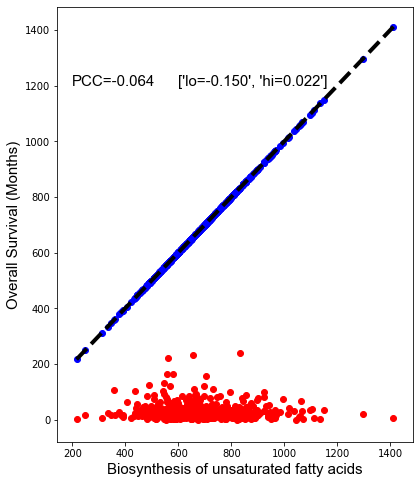

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def pearsonr_ci(z1,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    PCC : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    PCC, p = stats.pearsonr(z1,y)
    PCC_z = np.arctanh(PCC)
    se = 1/np.sqrt(z1.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = PCC_z-z*se, PCC_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return ('PCC=%0.3f'%PCC, 'lo=%0.3f'%lo, 'hi=%0.3f'%hi,'p=%0.3f'%p)

PCC, lo, hi, pearson = pearsonr_ci(z1,y,alpha=0.05)
CI = [lo,hi]


# Plotting
plt.figure(figsize=(14 , 8))

plt.subplot(1, 2, 1)
#plt.scatter(z1, y,color = "darkorange")
plt.scatter(z1, z1,color = "blue")
plt.scatter(z1, y,color = "red")
plt.xlabel("Biosynthesis of unsaturated fatty acids", fontname="Arial", fontsize=15)
plt.ylabel("Overall Survival (Months)", fontname="Arial", fontsize=15)
plt.plot([z1.min(), z1.max()], [z1.min(), z1.max()], 'k--', lw=4)
plt.text(200, 1200, PCC , fontname="Arial", fontsize=15)
plt.text(600, 1200,CI, fontname="Arial", fontsize=15)
#plt.savefig(r'C:\Users\U0033207PC\Desktop\LUAD FIREHOSE LEGACY DATABASE\PDF PLOT\PCA\DT\FLUX\VALIDATION_PCC_FLUXDTPCA.pdf')
plt.show()